In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# What is the most popular release year for movies on Netflix?

In [3]:
data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [4]:
movies_df = data[data['type'] == 'Movie']
movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [5]:
movies_df['release_year'].unique()

array([2020, 2021, 1993, 1996, 1998, 1997, 2010, 2013, 2017, 1975, 1978,
       1983, 1987, 2012, 2001, 2002, 2003, 2004, 2011, 2008, 2009, 2007,
       2005, 2006, 2018, 2019, 1994, 2015, 1982, 1989, 2014, 1990, 1991,
       1999, 2016, 1986, 1984, 1980, 1961, 2000, 1995, 1985, 1992, 1976,
       1959, 1988, 1981, 1972, 1964, 1954, 1979, 1958, 1956, 1963, 1970,
       1973, 1960, 1974, 1966, 1971, 1962, 1969, 1977, 1967, 1968, 1965,
       1945, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

In [6]:
release_year_counted = pd.DataFrame(movies_df['release_year'].value_counts().reset_index())
release_year_counted.columns = ['release_year', 'count']
release_year_counted

,release_year,count
0,2017,767
1,2018,767
2,2016,658
3,2019,633
4,2020,517
...,...,...
68,1966,1
69,1961,1
70,1946,1
71,1963,1


In [25]:
# Percentage of movies added in 2017 (the same for 2018). 
movies_amount = movies_df['release_year'].count()
movies_release_year_max = release_year_counted['count'][0]
percentage_movies_release_year_max = movies_release_year_max/movies_amount*100
percentage_movies_release_year_max.round(1)

12.5

([<matplotlib.patches.Wedge at 0x21ed9b99760>,
 [Text(1.0162674857624154, 0.4209517756015988, 'movies released at 2017'),
  Text(0.42095177560159885, 1.0162674857624154, 'movies released at 2018'),
  Text(-0.7778174593052025, -0.7778174593052023, 'rest movies released')])

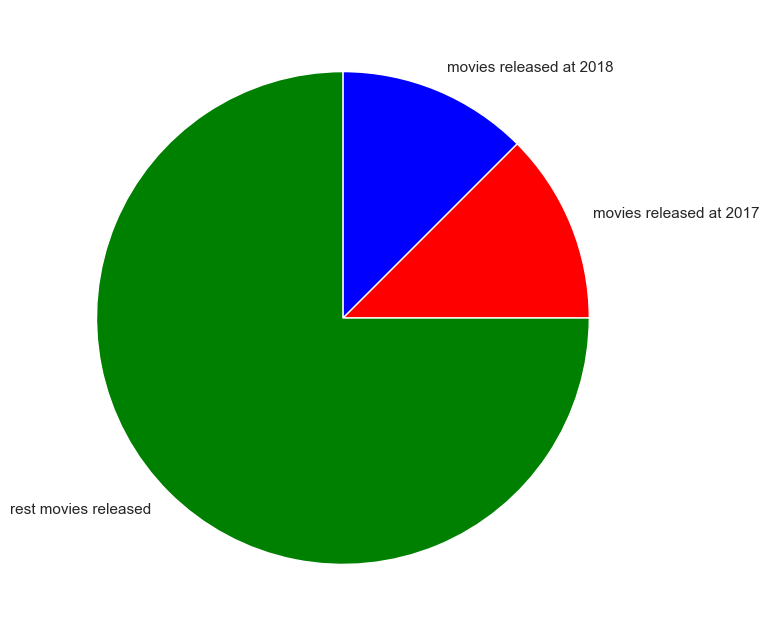

In [42]:
plt.figure(figsize=(8,8))
plt.pie([percentage_movies_release_year_max.round(1),percentage_movies_release_year_max.round(1), 100-2*percentage_movies_release_year_max.round(1)], labels=['movies released at 2017', 'movies released at 2018', 'rest movies released'], colors=['red','blue','green'])

# What year did netflix add the most content to its platform?

In [8]:
data['date_added'] = data['date_added'].str.strip()
data['new_date'] = pd.to_datetime(data['date_added'])
data['year_added'] = data['new_date'].dt.year
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_date,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,2021.0


In [9]:
data['year_added'].unique()

array([2021., 2020., 2019., 2018., 2017., 2016., 2015., 2014., 2013.,
       2012., 2011., 2009., 2008.,   nan, 2010.])

In [10]:
date_added_counted = pd.DataFrame(data['year_added'].value_counts().reset_index())
date_added_counted.columns = ['year_added', 'count']
date_added_counted

,year_added,count
0,2019.0,2016
1,2020.0,1879
2,2018.0,1649
3,2021.0,1498
4,2017.0,1188
5,2016.0,429
6,2015.0,82
7,2014.0,24
8,2011.0,13
9,2013.0,11


In [11]:
# Percentage of content added to netflix in 2019
content_amount = data['year_added'].count()
content_year_added_max = date_added_counted['count'][0]
percentage_content_year_added_max = content_year_added_max/content_amount*100
percentage_content_year_added_max.round(2)

22.92

([<matplotlib.patches.Wedge at 0x21edc03ed20>,
 [Text(0.8269478199020287, 0.7253670127316807, 'content added to netflix in 2019'),
  Text(-0.8269478199020287, -0.7253670127316807, 'rest content added to netflix')])

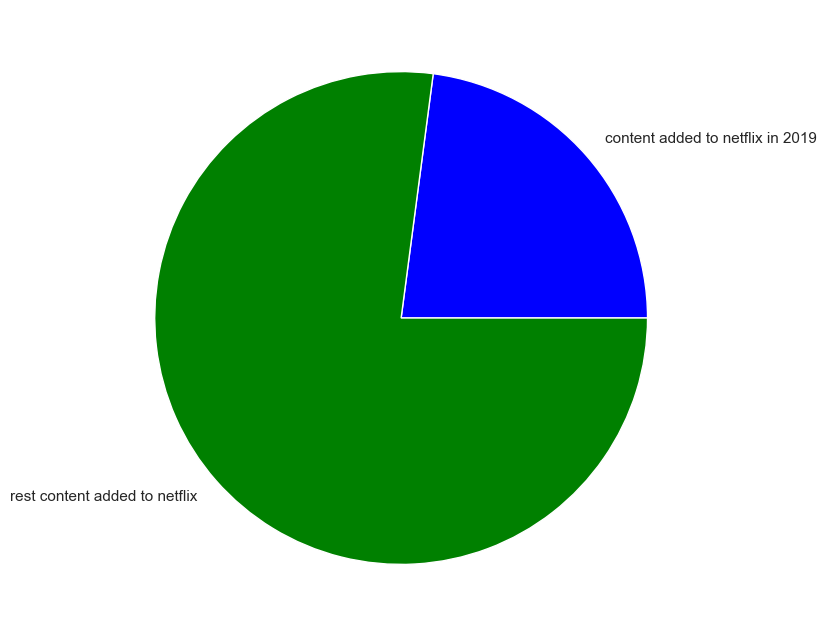

In [47]:
plt.figure(figsize=(8,8))
plt.pie([percentage_content_year_added_max.round(2), 100-percentage_content_year_added_max.round(2)], labels=['content added to netflix in 2019', 'rest content added to netflix'], colors=['blue', 'green'])

# What is the most popular month to add new content?

In [12]:
data['month_added'] = data['new_date'].dt.month
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_date,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0,9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,2021.0,9.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,2021.0,9.0


In [14]:
month_added_counted = pd.DataFrame(data['month_added'].value_counts().reset_index())
month_added_counted.columns = ['month_added', 'count']
month_added_counted

,month_added,count
0,7.0,827
1,12.0,813
2,9.0,770
3,4.0,764
4,10.0,760
5,8.0,755
6,3.0,742
7,1.0,738
8,6.0,728
9,11.0,705


In [20]:
# Percentage of content added in July
content_month_added_max = month_added_counted['count'][0]
percentage_content_month_added_max = content_month_added_max/content_amount*100
percentage_content_month_added_max.round(2)

9.4

([<matplotlib.patches.Wedge at 0x21edc0455b0>,
 [Text(1.0523832599518677, 0.32013977286972606, 'content added to netflix in July'),
  Text(-1.0523833049123306, -0.32013962507287497, 'content added in other months')])

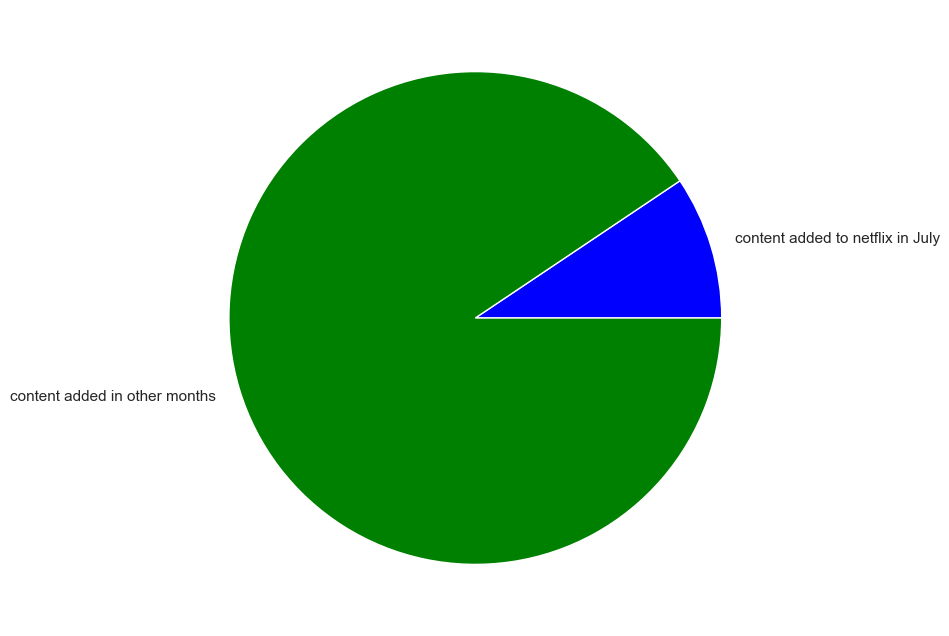

In [48]:
plt.figure(figsize=(8,8))
plt.pie([percentage_content_month_added_max.round(2), 100-percentage_content_month_added_max.round(2)], labels=['content added to netflix in July', 'content added in other months'], colors=['blue', 'green'])